<a href="https://colab.research.google.com/github/gitnicolas343/intro_neurociencias_Computacionesles_phyton/blob/main/Lab5_Spike_Train_Analysis_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Análisis Estadístico de Trenes de Spike

## Introducción

Las neuronas de la retina suelen responder a patrones de luz que se muestran en pequeñas secciones del campo visual. Sin embargo, cuando las neuronas de la retina se cultivan y se mantienen bajo condiciones ambientales y de luz constantes, seguirán disparando espontáneamente potenciales de acción. En una retina en pleno funcionamiento, esta actividad espontánea a veces se describe como actividad de fondo, que se modula en función de los estímulos visuales. Es útil comprender las propiedades de esta actividad de fondo para determinar en experimentos futuros cómo estas propiedades de activación se ven afectadas por estímulos específicos.

## Caso de Estudio

Una investigadora que examina las propiedades de actividad de fondo de una de estas neuronas se comunica con usted para discutir sus datos. Su colaboradora ha registrado los potenciales de acción en dos condiciones experimentales: con las luces de la habitación apagadas (niveles bajos de luz ambiental) o con las luces encendidas (niveles altos de luz ambiental). A ella le gustaría colaborar con usted para determinar si existe una diferencia en el disparo de fondo entre estas dos condiciones. El registro de actividad neuronala se ha hecho durante 30 segundos en cada condición.

## Ejercicio 1

Cargue los datos en python para su procesamiento. Para ello use el módulo scipy.io la función loadmat.

Debería encontrar dos variables en el diccionario de datos:

*SpikesLow*: tiempos de disparo durante 30 s en condiciones de poca luz,

*SpikesHigh*: tiempos de disparo durante 30 s en condiciones de luz alta.

**Q:** Cuál es el firing rate promedio en de la neurona en condiciones de luz baja y de luz ambiental?

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# TODO

datos = scipy.io.loadmat('/content/drive/MyDrive/NEURO CIENCIAS/08_spikes-1.mat')

spikeslow = datos['SpikesLow']  #tiempos para luz baja
spikeshigh = datos['SpikesHigh']#tiempos para luz ambiental

#dice que dura 30 segundos (tiempos de disparos)



print(f'promedio de firing spikes en condiciones de luz baja: {np.size(spikeslow[0])/30}' )
print(f'promedio de firing spikes en condiciones de luz ambiental: {np.size(spikeshigh[0])/30}')



promedio de firing spikes en condiciones de luz baja: 25.0
promedio de firing spikes en condiciones de luz ambiental: 32.3


## Ejercicio 2

Habrá notado que en nuestro experimento se nos da simplemente los tiempos de disparo. Para visualizar los tiempos de disparo se suele representar a través de un raster-plot. En este se muestra en el eje horizontal los tiempos de disparo y en el eje vertical se grafica el índice de la neurona que emitió dicho disparo. En este experimeto tenemos solo una neurona pero bajo dos experimentos distintos así que pues al eje vertical se le puede asignar el índice 1 (para el experimento de poca luz) y 2 (para el de luz alta)

Haga el raster plot para las dos condiciones experimentales.

**Q** Encuentra alguna diferencia cualitativa entre el disparo de la neurona en ambas condiciones experimentales?

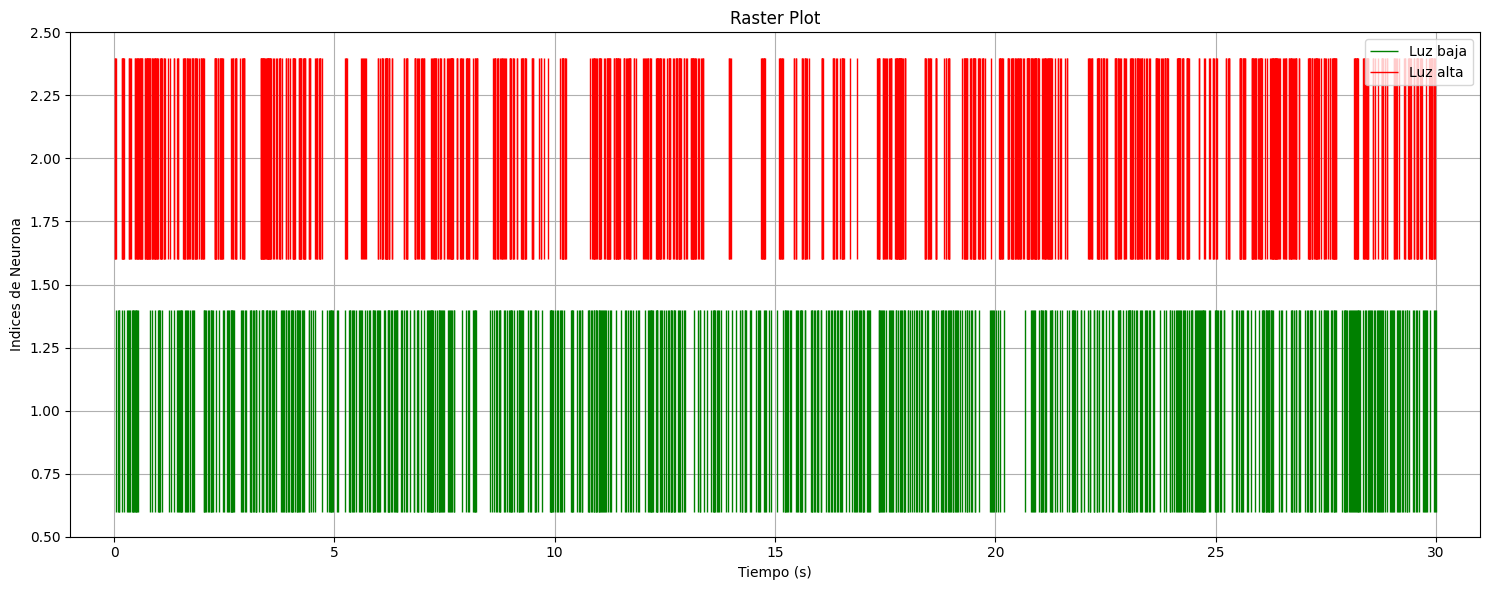

In [ ]:
# TODO
plt.figure(figsize=(15, 6))
plt.eventplot(spikeslow[0],colors='green',lineoffsets=1,linelengths=0.8,linewidths=1, label='Luz baja')
plt.eventplot(spikeshigh[0],colors='red',lineoffsets=2,linelengths=0.8,linewidths=1, label='Luz alta')
plt.title('Raster Plot')
plt.xlabel('Tiempo (s)')
plt.ylabel('Indices de Neurona')
plt.ylim(0.5, 2.5)
plt.xlim(-1, 31)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


#me base en esta pagina para la realizar este ejercicio
#https://pythontic.com/visualization/charts/spikerasterplot

A simple vista en el raster plot , a luz alta parece que la neurona dispara en ciertos tiempos debido a que podemos odservar una densidad de barra mayor en ciertos espacios de tiempo y luego  por un corto tiempo cae en densidad o no hay en su defecto barras, mientras que en la otra grafica (luz baja) dispara repetidamente en tiempos distintos aparentemente desordenados y para en otros distintos, las densidades no son regulares ni espaciadas en patrones evidentes.     

## Ejercicio 3

Compute la distribución de los ISI para ambos experimentos. Esto le debe permitir determinar con más claridad las diferencias entre la estadística de disparo de la neurona en ambos experimentos.

**Q** Describa las características de los dos histogramas. ¿Qué características de las distribuciones ISI son similares para las dos condiciones? ¿Qué características son diferentes?

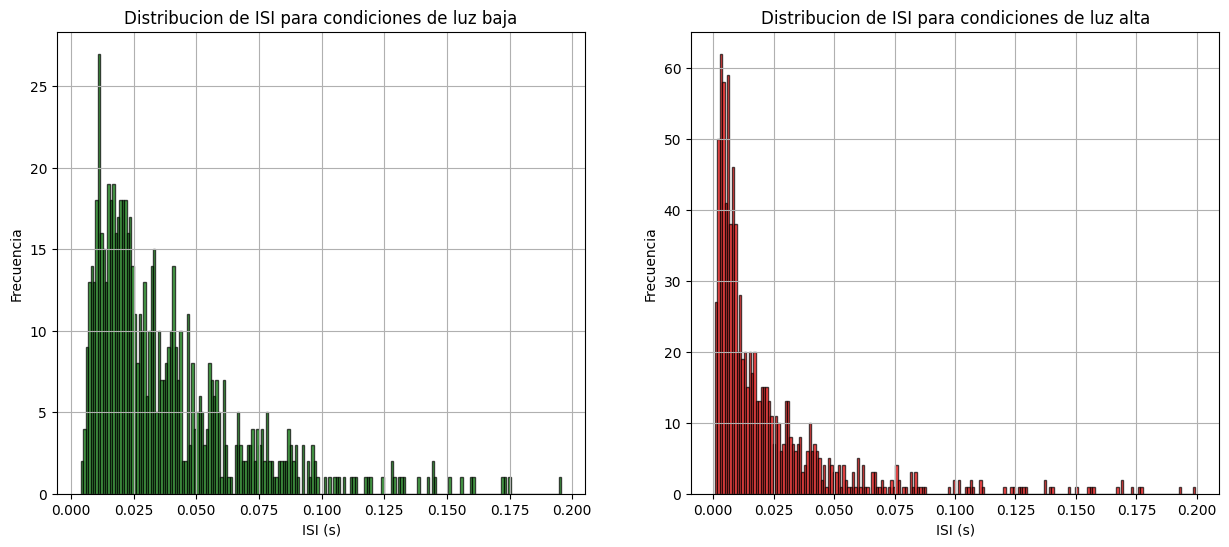

In [ ]:
# TODO

#lo ideal es identificar los intervalos de los spikes
int_spikeslow = np.diff(spikeslow)         #aqui obtenemos las diferencias entre los tiemos de disaros
int_spikeshigh = np.diff(spikeshigh)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(int_spikeslow[int_spikeslow<0.2] ,bins = 200 ,color='green', alpha=0.7, label='Luz baja',edgecolor='black')  #las distribucines generalmente se refiere a los histogrmas
plt.title('Distribucion de ISI para condiciones de luz baja')                                         #seleccionamos bins automticos y ajustamos parametros automaticos
plt.xlabel('ISI (s)')
plt.ylabel('Frecuencia')
plt.grid()
plt.subplot(1, 2, 2)
plt.hist(int_spikeshigh[int_spikeshigh<0.2],bins = 200 ,color='red', alpha=0.7, label='Luz alta',edgecolor='black')
plt.title('Distribucion de ISI para condiciones de luz alta')
plt.xlabel('ISI (s)')
plt.ylabel('Frecuencia')
plt.grid()

plt.show()

**DESCRICION:**
podemos ver una grafica con un histogrma de frecuencias en los intervalos de tiempo de disparo de dos neuronas una en condiciones de poca luz y otra en condiciones de mucha, el eje x tiene la distribucion de ISI (inter-spike  interval) o tiemos de disparo y en el eje y tenemos la frecuencia de disaro de las neuronas    

**DIFERENCIAS:** A Luz alta la mayoria de disparos de la neurona es mayor entre 0 y 0.025 s para la posteriormente dejar de disparar tan seguido haciendo que la frecuencia se situe levemente bajo 10 y aiga a 0 desues 0.1, a diferencia de las condiciones de poca luz  donde se situa por debajo de 10 despues de  0.050 s y tener un cambio abrupto a 0 desues de 0.0175

**SIMILITUDES:**
los disparos son mas recurrentes en los primeros 0.025  y despues paran en 0.0175 aproximadamente  

## Ejercicio 4:

Una forma común de determinar la variabilidad en el disparo de una neurona es através del coeficiente de variación del ISI definido como

$$
CV(ISI) = \frac{\sigma(ISI)}{\mu(ISI)}
$$

Una regla general para interpretar el CV es el siguiente

* $CV \approx 0$, el disparo es regular -Disparo Tónico-
* $CV \approx 1$, el disparo es irregular, parece completamente aleatorio -Proceso de Poisson-
* $CV > 1$, el disparo es de tipo Bursting, la neurona emite "ráfagas" de spikes en un periodo corto, y se queda sin disparar durante un periodo largo

Calcule el CV para los dos experimentos

**Q** Qué tipo de disparo hay en cada uno de los dos experimentos?

In [ ]:
# TODO

#implementamos la formula dada con los rangos que poseen la distribucion ISI
media_low = np.mean(int_spikeslow)
des_low = np.std(int_spikeslow)
CV_low = des_low / media_low

media_high = np.mean(int_spikeshigh)
des_high = np.std(int_spikeshigh)
CV_high = des_high / media_high


print(f"CV (Luz baja): {CV_low}")
print(f"CV (Luz alta): {CV_high}")

CV (Luz baja): 0.9642104029667415
CV (Luz alta): 2.0217913245616757


In [ ]:
#de forma automatica

def determinastioCV(cv):    #funcion con los parametros establecidos
    if round(cv) == 0:
        return "disparo Tónico"
    elif round(cv) > 1:
        return "Bursting"
    else:
        return "Proceso de Poisson"

print(f"TIPO DE DISPARO DE CV_LOW: {determinastioCV(CV_low)}")
print(f"TIPO DE DISPARO DE CV_HIGH: {determinastioCV(CV_high)}")

TIPO DE DISPARO DE CV_LOW: Proceso de Poisson
TIPO DE DISPARO DE CV_HIGH: Bursting


In [ ]:
print(f"CV (Luz baja): {CV_low}  , redondeado: {round(CV_low,1)}")
print(f"CV (Luz alta): {CV_high} , redondeado: {round(CV_high,1)}")

CV (Luz baja): 0.9642104029667415  , redondeado: 1.0
CV (Luz alta): 2.0217913245616757 , redondeado: 2.0


## Ejercicio 5

Otro enfoque común para analizar datos de picos es discretizar el tiempo en intervalos de ancho fijo y contar el número de eventos -spikes- que ocurren en cada intervalo de tiempo. La secuencia de conteo de picos en todos los intervalos a veces se denomina proceso de incremento del tren de spikes. Cuando los intervalos de tiempo son lo suficientemente pequeños, digamos 1 ms, el proceso de incremento resultante es solo una secuencia de ceros y unos.

Cuente los eventos que hay en cada intervalos de 50ms para los dos experimentos.

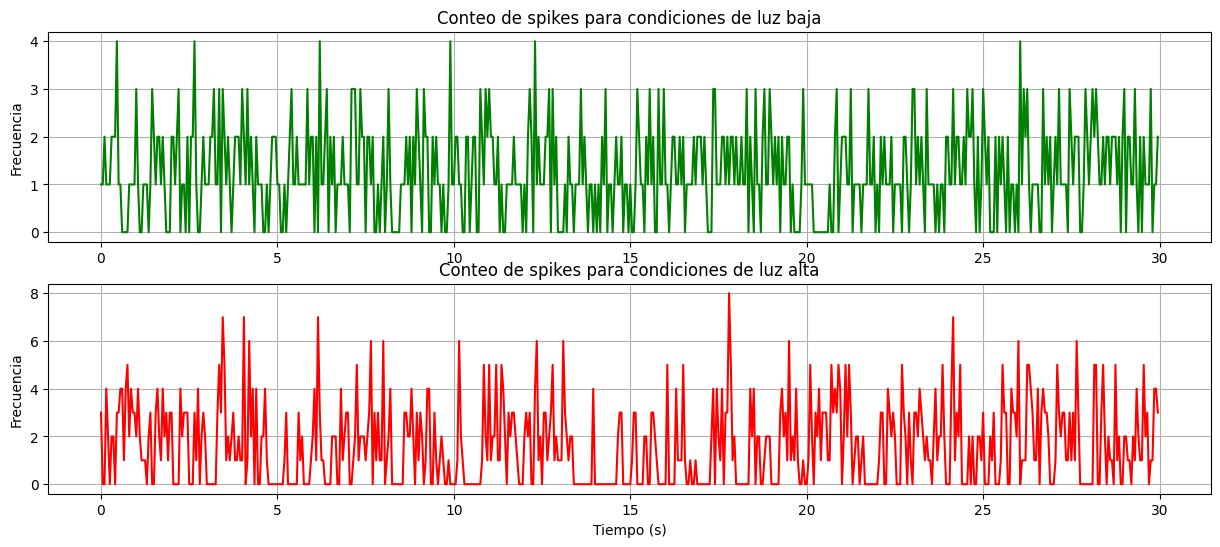

In [ ]:
# TODO

#separaciones de 0.05 = 50ms
bins = np.arange(0,30,0.05)

#esta funcion cuenta las frecuencias de disparo en el data set  por cada
#variacion de intervalo de 0.05

def contar_spikes(spikes, bins):

    valores = list()

    for bin in bins:                                #itera sobre los bins
        contador = 0                                #contador de las frecuencias
        for val in list(spikes):                          #comparamos el tiempo del spike y lo contamos si cae en el intervalo
            if  bin < val   and  val <(bin + 0.05):
                contador +=1
        valores.append(contador)
    return valores


#GRAFICAS

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(bins, contar_spikes(spikeslow[0],bins), color = "g")                  #decidi hacerlo como un plot de matplolib ya que un bar plot no se veia bien
plt.title('Conteo de spikes para condiciones de luz baja')

plt.ylabel('Frecuencia')
plt.grid()

plt.subplot(2, 1, 2)

plt.plot(bins, contar_spikes(spikeshigh[0],bins), color = "r")
plt.title('Conteo de spikes para condiciones de luz alta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia')
plt.grid()

plt.show()


In [ ]:
#conteos

conteo_lusz_baja = contar_spikes(spikeslow[0],bins)
print(f"Conteo de spikes en luz baja: {sum(conteo_lusz_baja)}")

conteo_lusz_alta = contar_spikes(spikeshigh[0],bins)
print(f"Conteo de spikes en luz alta: {sum(conteo_lusz_alta)}")

Conteo de spikes en luz baja: 750
Conteo de spikes en luz alta: 969


Otra medida de variabilidad de disparo se puede calcular con el proceso de incremento usando el factor de Fano muestral (FF). Es fácil definir el factor de Fano: FF es la varianza muestral del proceso incremental dividida por la media muestral del proceso incremental.

$$
FF = Var(X)/\mu(X)
$$

Al igual que con el CV, el Factor de Fano tiene interpretaciones similares

* $FF \approx 0$, el disparo es regular -Disparo Tónico-
* $FF \approx 1$, el disparo es irregular, parece completamente aleatorio -Proceso de Poisson-
* $FF > 1$, el disparo es de tipo Bursting, la neurona emite "ráfagas" de spikes en un periodo corto, y se queda sin disparar durante un periodo largo

**Q** Calucle el factor de Fano para el proceso de incremento calculado en ambas condiciones


In [ ]:
# TODO
#se implementa la formula
FF_low = np.var(contar_spikes(spikeslow[0],bins))/np.mean(contar_spikes(spikeslow[0],bins))
FF_high = np.var(contar_spikes(spikeshigh[0],bins))/np.mean(contar_spikes(spikeshigh[0],bins))


#mostramos resultados
print(f"FF (Luz baja): {FF_low}  , redondeado: {round(FF_low,1)}")
print(f"FF (Luz alta): {FF_high} , redondeado: {round(FF_high,1)}")

FF (Luz baja): 0.7153333333333334  , redondeado: 0.7
FF (Luz alta): 1.775092879256966 , redondeado: 1.8


In [ ]:
def determinastioFF(cv):    #funcion con los parametros establecidos para FF
    if round(cv) > 1:
        return "Bursting"
    elif round(cv) == 1:
        return "Proceso de Poisson"
    else:
        return "Disparo Tonico"


print(f"tipo FF_LOW: {determinastioFF(FF_low)}")
print(f"tipo FF_HIGH: {determinastioFF(FF_high)} ")

tipo FF_LOW: Proceso de Poisson
tipo FF_HIGH: Bursting 
